# Tarea 00

Juan Camilo Gallego
CC: 1000098978

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


# Cargar el dataset
df = sns.load_dataset('penguins')

In [90]:
#Estimador de la correlacion de Pearson
def pearson_correlation(X, Y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos listas o arrays de datos X e Y.

    Parámetros:
    X -- Lista o array de valores de la variable X.
    Y -- Lista o array de valores de la variable Y.

    Retorna:
    r -- Coeficiente de correlación de Pearson.
    """
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    sum_XY = np.sum(X * Y)
    numerador = sum_XY - n * mean_X * mean_Y

    # Desviaciones estándar muestrales (n-1 en el denominador)
    std_X = np.std(X, ddof=1)  # ddof=1 para obtener S_x
    std_Y = np.std(Y, ddof=1)  # ddof=1 para obtener S_y

    denominador = (n - 1) * std_X * std_Y
    r = numerador / denominador
    return r

## Primera aproximación a los datos de forma general y su limpieza:

### 1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie? 

In [91]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [92]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Hay 3 especies diferentes de pinguinos en el dataset.
Las caracteristicas que se dan para cada especie son:
- isla que habita
- largo del pico
- profundidad del pico
- largo de la aleta
- masa corporal
- sexo

### 2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [93]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [94]:
df_clean = df.copy().dropna()
df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Hay algunas filas enteras que contienen NaN por lo que se van a dropear todas las filas con NaNs

### 3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

<Axes: xlabel='island'>

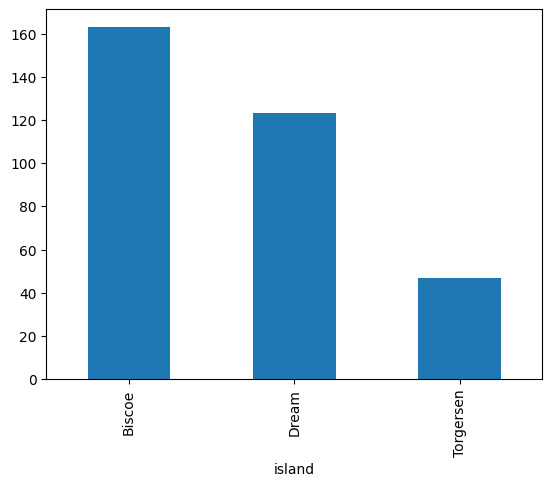

In [95]:
df_clean.groupby('island')['species'].count().plot(kind='bar')

La isla con mayor numero de pinguinos es Biscoe.
Se tiene un desbalance en el numero de pinguinos por isla debido a que la isla de Torgersen tiene menos de la mitad de pinguinos que cualquiera de las otras dos.

### 4. Repita la pregunta anterior observando las especies.

In [96]:
df_clean.groupby('species')['island'].count()


species
Adelie       146
Chinstrap     68
Gentoo       119
Name: island, dtype: int64

EL mayor numero de pinguinos de una especie es Adelie. Al igual que en el punto anterior se observa un desbalance para el caso de la especie Chinstrap debido a su baja cantidad.

## Tendencias y visualizacion de las variables

### 5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie? 

In [97]:
print('Medias del largo del pico mm (media) (desviacion estandar)')
df_clean.groupby('species')['bill_length_mm'].agg(['mean','std'])

Medias del largo del pico mm (media) (desviacion estandar)


,mean,std
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


### 6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [98]:
df_clean.loc[df_clean["bill_length_mm"].idxmax()]

species              Gentoo
island               Biscoe
bill_length_mm         59.6
bill_depth_mm          17.0
flipper_length_mm     230.0
body_mass_g          6050.0
sex                    Male
Name: 253, dtype: object

El pinguino con el pico mas largo es de la especie Gentoo y le mide 59.6 mm 

### 7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos? 

In [99]:
df_clean.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


### 8. Describa la distribucion con ayuda de la media, desviacion estandard 

Podemos ver que los pinguinos Gentoo son significativamente mas pesados que las otras dos. Tambien presentan una desviacion estandar mayor, por lo que la distribucion de sus pesos son mas dispersos.

### 9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras? 

In [100]:
df_clean.groupby('sex')['body_mass_g'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


Se puede notar que aunque las medias indican que los machos son bastante mas pesados que las hembras, tambien se tiene que la desviacion estandar hace que se sobrepongan los valores por lo que no se podria afirmar que todos los machos son mas pesados que las hembras, pero en general si se tiene esa tendencia.

### 10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie? 

In [101]:
print('Medias del largo de la aleta mm (media) (desviacion estandar)')
df_clean.groupby('species')['flipper_length_mm'].agg(['mean','std'])

Medias del largo de la aleta mm (media) (desviacion estandar)


,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


### 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [102]:
print('Minimo y maximo del largo de la aleta mm')
df_clean.groupby('species')['flipper_length_mm'].agg(['max','min'])

Minimo y maximo del largo de la aleta mm


,max,min
species,,
Adelie,210.0,172.0
Chinstrap,212.0,178.0
Gentoo,231.0,203.0


### 12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [103]:
print('Longitud del pico de diferentes especies en cada isla')
df_clean.groupby(['species', 'island'])['bill_length_mm'].agg(['mean', 'std', 'count'])

Longitud del pico de diferentes especies en cada isla


mean       std  count
species   island                               
Adelie    Biscoe     38.975000  2.480916     44
          Dream      38.520000  2.484276     55
          Torgersen  39.038298  3.028097     47
Chinstrap Dream      48.833824  3.339256     68
Gentoo    Biscoe     47.568067  3.106116    119

Se puede ver que los pinguinos Adelie aunque se reparten por las tres islas, estos tienen una longitud para su pico bastante constante entre cada isla

### 13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [104]:
df_clean.groupby(['species', 'island'])['bill_length_mm'].mean()

mean_by_island = df_clean.groupby(["island", "species"])["bill_length_mm"].mean().reset_index()
std_by_island = mean_by_island.groupby("island")["bill_length_mm"].std().sort_values(ascending=False)

print("Desviación estándar de las medias de longitud del pico por isla:")
print(std_by_island)

Desviación estándar de las medias de longitud del pico por isla:
island
Dream        7.292975
Biscoe       6.076216
Torgersen         NaN
Name: bill_length_mm, dtype: float64


Torgersen no tiene desviacion estandar ya que solo la especie Adelie la habita.

## Relación entre caracteristicas de los pingüinos

### 14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

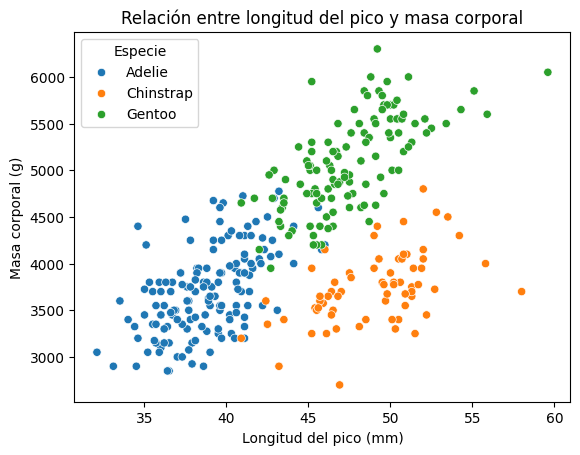

In [105]:
sns.scatterplot(data=df_clean, x="bill_length_mm", y="body_mass_g", hue="species")
plt.title("Relación entre longitud del pico y masa corporal")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.legend(title="Especie")
plt.show()

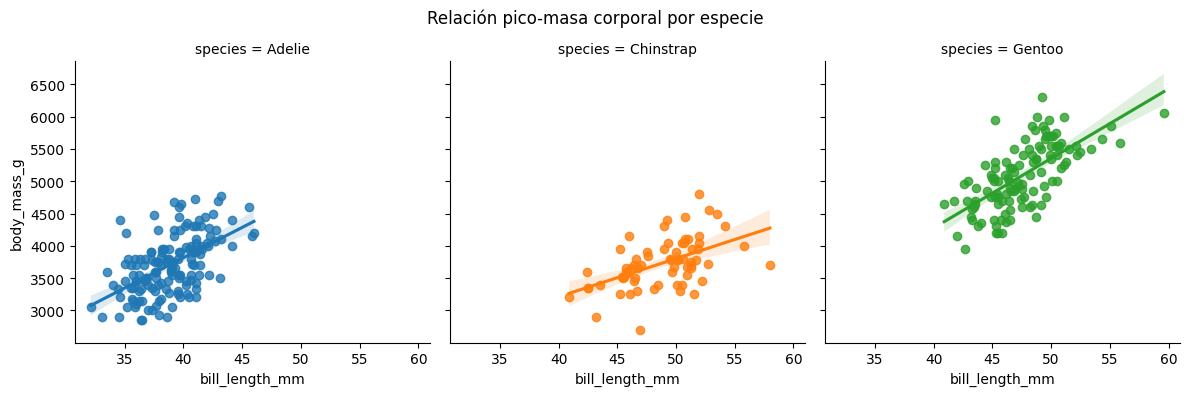

In [106]:
g = sns.lmplot(
    data=df_clean,
    x="bill_length_mm",
    y="body_mass_g",
    hue="species",
    col="species",
    height=4,
    aspect=1
)
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Relación pico-masa corporal por especie")
plt.show()


Se observa una relacion proporcional entre la longitud del pico y la masa corporal, a mayor largo del pico mayor masa corporal.
Realizando el analisis por especie se logra ver que las pendientes son distintas por lo que las relaciones son distintas para cada especie.

### 15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [110]:
species_df = df_clean["species"].unique()

for species in species_df:
    subset = df_clean[df_clean["species"] == species]
    corr = pearson_correlation(subset["bill_length_mm"], subset["body_mass_g"])
    print(f"Especie: {species}")
    print(f"  Correlación de Pearson: {corr:.2f}")

Especie: Adelie
  Correlación de Pearson: 0.54
Especie: Chinstrap
  Correlación de Pearson: 0.51
Especie: Gentoo
  Correlación de Pearson: 0.67


Se puede ver que la correlacion entre el peso y el largo del pico de los pinguinos gentoo son suficientemente significativas, los otros dos se podria decir que aunque si presentan ese comportamiento no lo tienen tanto como la gentoo.

### 16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

In [108]:
df_clean.groupby(["species", "sex"])["flipper_length_mm"].agg(["mean", "std", "count"])

mean       std  count
species   sex                                
Adelie    Female  187.794521  5.595035     73
          Male    192.410959  6.599317     73
Chinstrap Female  191.735294  5.754096     34
          Male    199.911765  5.976558     34
Gentoo    Female  212.706897  3.897856     58
          Male    221.540984  5.673252     61

Para las especies Chinstrap y Gentoo se puede ver que los machos tienen una aleta 10mm mayor que las hembras en promedio, y en Adelie solo 5 mm mayor

## Test de hipótesis

### 17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones. 


Se quiere ver si existe una correlacion entre el largo de los picos y la masa corporal de los pinguinos.


- **Hipótesis nula** $ H_0 $: no hay correlación real $\rho = 0 $.
- **Hipótesis alternativa** $ H_1 $: sí hay correlación $ \rho \neq 0 $.

Transformación para convertir el coeficiente de correlación \( r \) en un valor \( t \):

$$
t = \frac{r \sqrt{n-2}}{\sqrt{1-r^2}}
$$

In [120]:
x = df_clean['bill_length_mm']
y = df_clean['body_mass_g']
n = len(df_clean)

r = pearson_correlation(x, y)
t = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))
intervalo = stats.t.interval(0.95, n-2, loc=0, scale=1)

print(f"r = {round(r,4)}")
print(f'El estimador es: {round(t, 3)}')
print(f'El intervalo es: [{round(intervalo[0], 4)} , {round(intervalo[1], 4)}]')

r = 0.5895
El estimador es: 13.276
El intervalo es: [-1.9672 , 1.9672]


El estimador está fuera del intervalo y la hipotesis nula de no correlacion se rechaza.